# ISDS 558 Spring 2024
# Group 05
### Web Scraping and Data Visualization for Sports Analytics (NBA Data)

# New Section

In [ ]:
# Importing required packages

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def scrape_nba_stats(url, id):
    try:
        # Send a GET request to the URL
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an exception for 4xx or 5xx status codes
        #print(response.status_code)
        # Create a BeautifulSoup object to parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table with class 'stats_table'
        table = soup.find('table', class_='stats_table', id = id)

        if table is None:
            print("Error: Table not found on the page.")
            return None

        # Extract the headers from the table
        headers = []
        header_row = table.find('thead').find_all('tr')[-1] # Get the last header row
        for th in header_row.find_all('th')[:]:  # Skip the first empty header
            headers.append(th.text)

        # Extract the rows from the table
        rows = []
        for row in table.find('tbody').find_all('tr'):
            row_data = []
            for th in row.find_all('th'):
                th_text = th.text
                match = re.search(r'[^a-zA-Z0-9\s]', th_text)
                if match:
                  # If a special character is found, return the substring before it
                  row_data.append(th_text[:match.start()].strip())
                else:
                  # If no special character is found, return the original string
                  row_data.append(th_text)
            for td in row.find_all('td'):
                td_text = td.text
                try:
                  # Try to convert the string to a float
                  float(td_text)
                  # If successful, append the original string
                  row_data.append(td_text)
                except:
                  match = re.search(r'[^a-zA-Z0-9\s]', td_text)
                  if match:
                    # If a special character is found, return the substring before it
                    row_data.append(td_text[:match.start()].strip())
                  else:
                    # If no special character is found, return the original string
                    row_data.append(td_text)

            if len(row_data) == len(headers):
                rows.append(row_data)
            else:
                # Handle missing or extra columns
                if len(row_data) < len(headers):
                    # Add missing values
                    row_data.extend([''] * (len(headers) - len(row_data)))
                else:
                    # Remove extra columns
                    row_data = row_data[:len(headers)]
                rows.append(row_data)

        # print("Extracted rows:")
        # for row in rows:
        #     print(len(row), row)

        # Create a DataFrame from the extracted data
        df = pd.DataFrame(rows, columns=headers)

        # Drop rows where all values are empty strings
        df = df.loc[~(df == '').all(axis=1)]

        return df

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None

    except Exception as e:
        print(f"Error: {e}")
        return None

In [ ]:
# URL of the page to scrape train data
url_train = 'https://www.basketball-reference.com/leagues/NBA_2023.html'

# Scrape the NBA player stats
east_conf_win = 'confs_standings_E'
west_conf_win = 'confs_standings_W'
overall_stats = 'per_game-team'
east_win_train = scrape_nba_stats(url_train, east_conf_win)
west_win_train = scrape_nba_stats(url_train, west_conf_win)
overall_stats_train = scrape_nba_stats(url_train, overall_stats)

def print_df(df_name):
  if df_name is not None:
      # Print the DataFrame
      print(f"\nScraped data: {df_name}")
  else:
      print(f"Failed to scrape data {df_name.name}")

print_df(east_win_train)
print_df(west_win_train)
print_df(overall_stats_train)


Scraped data:      Eastern Conference   W   L  W/L%    GB   PS/G   PA/G    SRS
0       Milwaukee Bucks  58  24  .707        116.9  113.3   3.61
1        Boston Celtics  57  25  .695   1.0  117.9  111.4   6.38
2    Philadelphia 76ers  54  28  .659   4.0  115.2  110.9   4.37
3   Cleveland Cavaliers  51  31  .622   7.0  112.3  106.9   5.23
4       New York Knicks  47  35  .573  11.0  116.0  113.1   2.99
5         Brooklyn Nets  45  37  .549  13.0  113.4  112.5   1.03
6            Miami Heat  44  38  .537  14.0  109.5  109.8  -0.13
7         Atlanta Hawks  41  41  .500  17.0  118.4  118.1   0.32
8       Toronto Raptors  41  41  .500  17.0  112.9  111.4   1.59
9         Chicago Bulls  40  42  .488  18.0  113.1  111.8   1.37
10       Indiana Pacers  35  47  .427  23.0  116.3  119.5  -2.91
11   Washington Wizards  35  47  .427  23.0  113.2  114.4  -1.06
12        Orlando Magic  34  48  .415  24.0  111.4  114.0  -2.39
13    Charlotte Hornets  27  55  .329  31.0  111.0  117.2  -5.89
14      De

In [ ]:
# URL of the page to scrape test data
url_test = 'https://www.basketball-reference.com/leagues/NBA_2024.html'

# Scrape the NBA player stats
east_win_test = scrape_nba_stats(url_test, east_conf_win)
west_win_test = scrape_nba_stats(url_test, west_conf_win)
overall_stats_test = scrape_nba_stats(url_test, overall_stats)

def print_df(df_name):
  if df_name is not None:
      # Print the DataFrame
      print("\nScraped data:")
      print(df_name)

    # Export the DataFrame to a CSV file
    #csv_filename = 'nba_stats_2024.csv'
    #df.to_csv(csv_filename, index=False)
    #print(f"\nData exported to {csv_filename}")
  else:
      print("Failed to scrape data.")

print_df(east_win_test)
print_df(west_win_test)
print_df(overall_stats_test)


Scraped data:
     Eastern Conference   W   L  W/L%    GB   PS/G   PA/G     SRS
0        Boston Celtics  64  18  .780        120.6  109.2   10.75
1       New York Knicks  50  32  .610  14.0  112.8  108.2    4.36
2       Milwaukee Bucks  49  33  .598  15.0  119.0  116.4    2.44
3   Cleveland Cavaliers  48  34  .585  16.0  112.6  110.2    1.98
4         Orlando Magic  47  35  .573  17.0  110.5  108.4    1.48
5        Indiana Pacers  47  35  .573  17.0  123.3  120.2    2.75
6    Philadelphia 76ers  47  35  .573  17.0  114.6  111.5    2.51
7            Miami Heat  46  36  .561  18.0  110.1  108.4    1.10
8         Chicago Bulls  39  43  .476  25.0  112.3  113.7   -1.77
9         Atlanta Hawks  36  46  .439  28.0  118.3  120.5   -2.38
10        Brooklyn Nets  32  50  .390  32.0  110.4  113.3   -3.02
11      Toronto Raptors  25  57  .305  39.0  112.4  118.8   -6.45
12    Charlotte Hornets  21  61  .256  43.0  106.6  116.8  -10.12
13   Washington Wizards  15  67  .183  49.0  113.7  123.0   -

In [ ]:
player_stats_train = pd.read_excel('Team_Player_Stats_Train_2022_23.xlsx')
print(player_stats_train)

player_stats_test = pd.read_excel('Team_Player_Stats_Test_2023_24.xlsx')
print(player_stats_test)

                      Team  Height  Weight   Age  Experience
0            Atlanta Hawks   198.6    99.7  26.1         3.7
1           Boston Celtics   201.2    98.2  25.9         5.8
2            Brooklyn Nets   199.9    98.6  29.0         5.7
3        Charlotte Hornets   197.6   104.2  25.5         3.6
4            Chicago Bulls   198.9   101.3  25.7         5.4
5      Cleveland Cavaliers   198.4    99.1  26.2         5.1
6         Dallas Mavericks   199.1    98.4  26.8         5.4
7           Denver Nuggets   202.9    99.6  26.5         5.0
8          Detroit Pistons   198.6   100.3  24.4         3.8
9    Golden State Warriors   196.6   102.2  27.8         5.5
10         Houston Rockets   199.6    95.7  24.8         2.3
11          Indiana Pacers   198.9   100.4  26.3         3.2
12    Los Angeles Clippers   199.6    98.4  27.2         6.6
13      Los Angeles Lakers   200.2   100.0  29.9         5.4
14       Memphis Grizzlies   198.1   101.5  24.1         3.1
15              Miami He

In [ ]:
def data_clean(win1, win2, overall, player):
  # Appending Eastern and Western conference standings table.
  win1 = win1.rename(columns = {"Eastern Conference" : "Team", "W/L%" : "Win_Percent"})
  win2 = win2.rename(columns = {"Western Conference" : "Team", "W/L%" : "Win_Percent"})
  standing_df = pd.concat([win1, win2])
  standing_df = standing_df[['Team', 'Win_Percent']]

  # Renaming columns in stats dataframe
  overall = overall.rename(columns = {"FG%" : "FG_Percent", "3P" : "Three_PointFG", "3PA" : "Three_PointAssist", "3P%" : "Three_PointFG__Percent",
                                                        "2P" : "Two_PointFG", "2PA" : "Two_PointAssist", "2P%" : "Two_PointFG__Percent", "FT%" : "FT_Percent"})

  # Merging the Conference Standings table with the Overall Statistics table to get the win percent from the conference standings tables
  stats_player = pd.merge(overall, player, on = 'Team')
  stats = pd.merge(standing_df, stats_player, on = 'Team')

  # Converting each column to numeric and handling invalid parsing error
  for col in stats.columns[1:].tolist():
      stats[col] = pd.to_numeric(stats[col], errors='coerce')

  # Convert categorical columns
  # Assuming 'Team' should be categorical
  stats['Team'] = stats['Team'].astype('category')
  return(stats)


In [ ]:
train_stats = data_clean(east_win_train, west_win_train, overall_stats_train, player_stats_train)
test_stats = data_clean(east_win_test, west_win_test, overall_stats_test, player_stats_test)
train_stats.head()

,Team,Win_Percent,Rk,G,MP,FG,FGA,FG_Percent,Three_PointFG,Three_PointAssist,...,AST,STL,BLK,TOV,PF,PTS,Height,Weight,Age,Experience
0,Milwaukee Bucks,0.707,9,82,241.8,42.7,90.4,0.473,14.8,40.3,...,25.8,6.4,4.9,14.6,18.1,116.9,199.6,97.3,27.9,7.2
1,Boston Celtics,0.695,4,82,243.7,42.2,88.8,0.475,16.0,42.6,...,26.7,6.4,5.2,13.4,18.8,117.9,201.2,98.2,25.9,5.8
2,Philadelphia 76ers,0.659,14,82,242.4,40.8,83.8,0.487,12.6,32.6,...,25.2,7.7,4.7,13.7,20.4,115.2,198.9,101.4,27.1,5.1
3,Cleveland Cavaliers,0.622,25,82,242.4,41.6,85.2,0.488,11.6,31.6,...,24.9,7.1,4.7,13.3,19.0,112.3,198.4,99.1,26.2,5.1
4,New York Knicks,0.573,11,82,243.4,42.0,89.4,0.470,12.6,35.7,...,22.9,6.4,4.1,13.0,20.3,116.0,197.4,95.7,26.1,3.9


#Visualizations

In [ ]:
train_stats.iloc[:, 4:].corr()

,MP,FG,FGA,FG_Percent,Three_PointFG,Three_PointAssist,Three_PointFG__Percent,Two_PointFG,Two_PointAssist,Two_PointFG__Percent,...,AST,STL,BLK,TOV,PF,PTS,Height,Weight,Age,Experience
MP,1.000000,0.097628,0.040749,0.073493,0.248648,0.251659,0.131802,-0.139454,-0.190555,0.213352,...,-0.122223,-0.233224,-0.325290,-0.395808,-0.208988,0.280050,-0.217755,-0.004995,0.043934,0.230188
FG,0.097628,1.000000,0.635086,0.480887,0.044055,-0.000963,0.133414,0.595386,0.377732,0.336558,...,0.636168,0.039785,0.255524,-0.027596,-0.222903,0.764711,0.090873,0.228194,-0.012228,-0.074907
FGA,0.040749,0.635086,1.000000,-0.371212,-0.074005,0.069142,-0.411934,0.455103,0.532239,-0.347733,...,0.265315,0.158324,0.179422,0.034298,0.041398,0.385003,-0.141853,0.169225,-0.251227,-0.401637
FG_Percent,0.073493,0.480887,-0.371212,1.000000,0.139169,-0.076965,0.627452,0.197172,-0.152014,0.800691,...,0.465178,-0.123142,0.105061,-0.073555,-0.320644,0.480768,0.255655,0.086635,0.273583,0.366719
Three_PointFG,0.248648,0.044055,-0.074005,0.139169,1.000000,0.954918,0.646175,-0.776090,-0.853558,0.520644,...,0.399252,-0.433773,-0.070241,0.055968,0.128331,0.535111,-0.053342,-0.082539,0.295718,0.469432
Three_PointAssist,0.251659,-0.000963,0.069142,-0.076965,0.954918,1.000000,0.392262,-0.769884,-0.807733,0.421579,...,0.284098,-0.434522,-0.098146,0.071032,0.120405,0.474344,-0.126371,-0.092361,0.215401,0.337859
Three_PointFG__Percent,0.131802,0.133414,-0.411934,0.627452,0.646175,0.392262,1.000000,-0.431746,-0.574636,0.530267,...,0.494294,-0.238273,0.041873,-0.028883,0.078437,0.437948,0.183375,-0.039074,0.365404,0.595855
Two_PointFG,-0.139454,0.595386,0.455103,0.197172,-0.776090,-0.769884,-0.431746,1.000000,0.922844,-0.201868,...,0.080321,0.369615,0.212006,-0.059120,-0.249092,0.053587,0.104070,0.203039,-0.242737,-0.424587
Two_PointAssist,-0.190555,0.377732,0.532239,-0.152014,-0.853558,-0.807733,-0.574636,0.922844,1.000000,-0.561906,...,-0.080745,0.464607,0.191048,-0.040671,-0.079118,-0.174182,0.025405,0.181130,-0.329830,-0.522447
Two_PointFG__Percent,0.213352,0.336558,-0.347733,0.800691,0.520644,0.421579,0.530267,-0.201868,-0.561906,1.000000,...,0.389298,-0.368954,-0.035310,-0.056395,-0.316156,0.576490,0.144163,0.004552,0.298382,0.411215


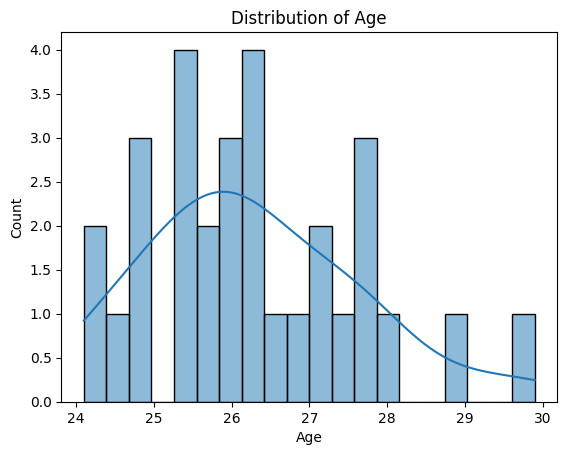

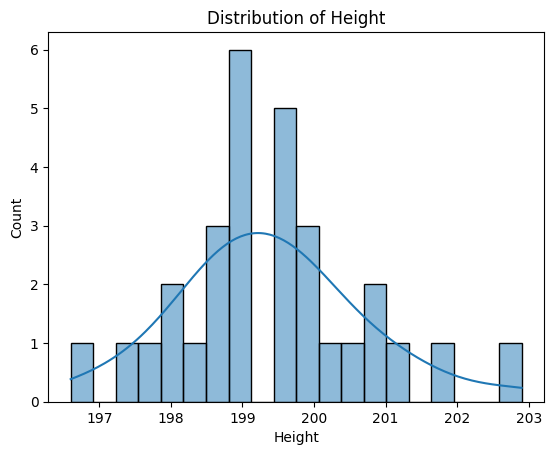

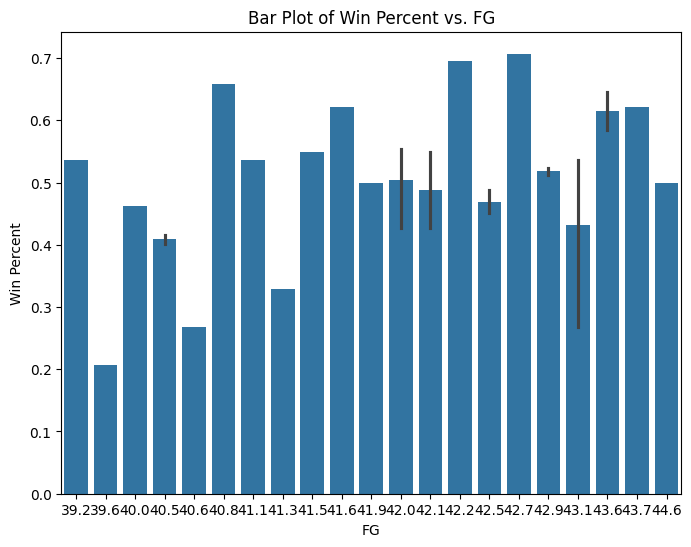

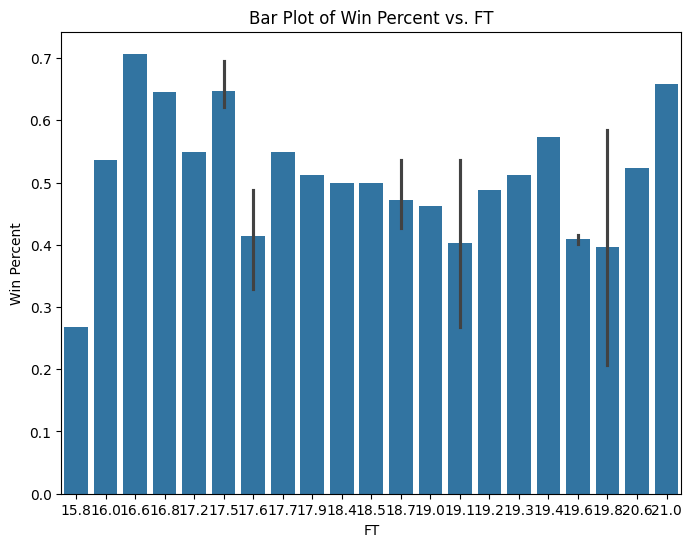

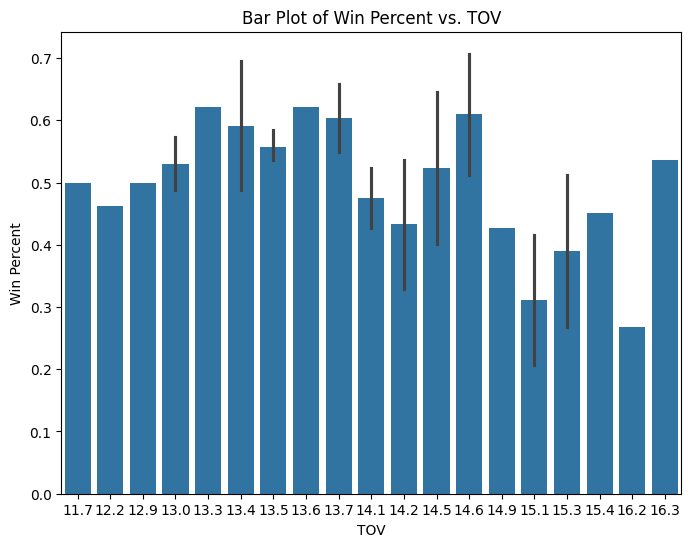

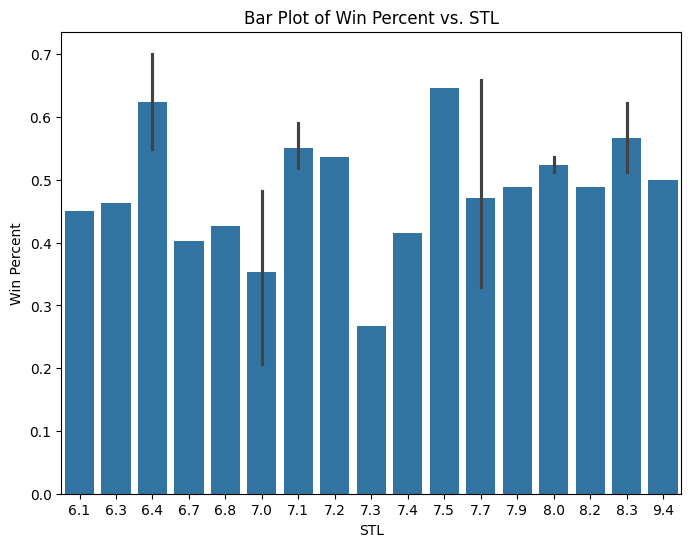

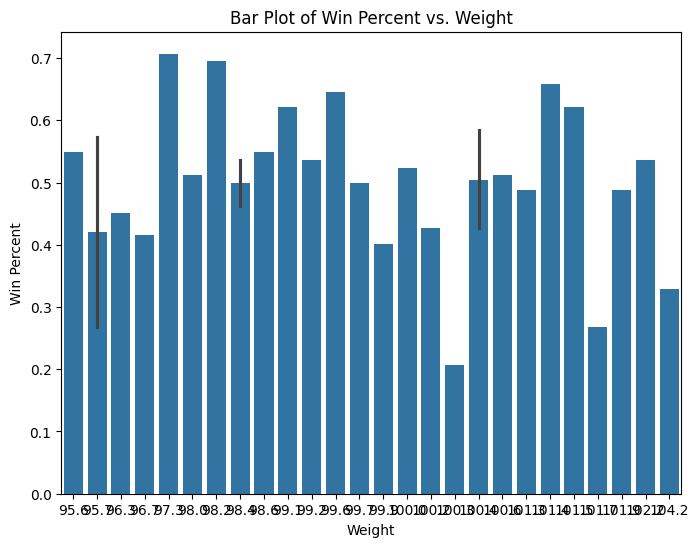

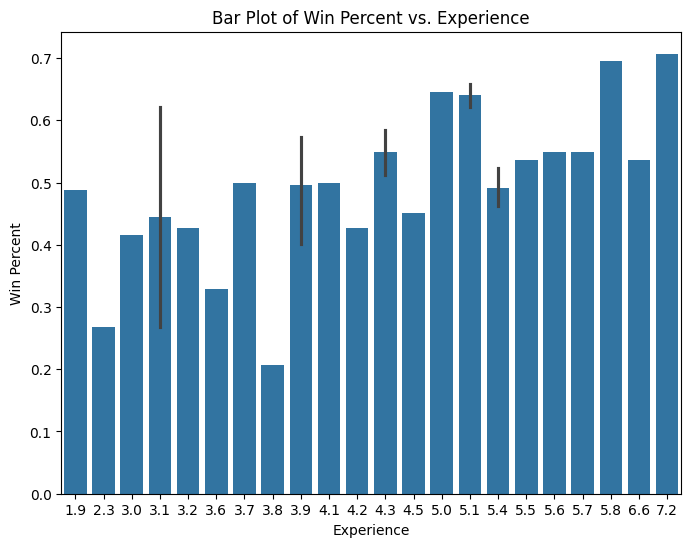

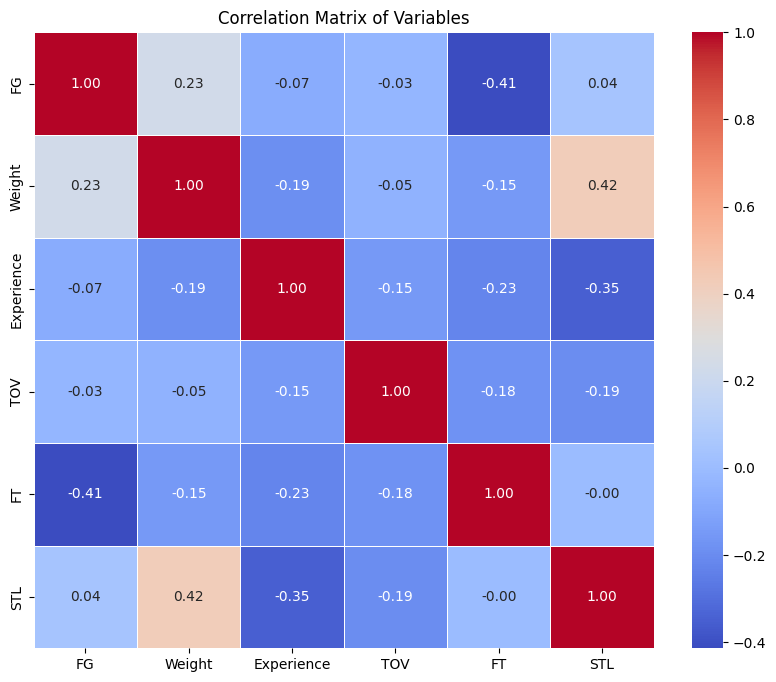

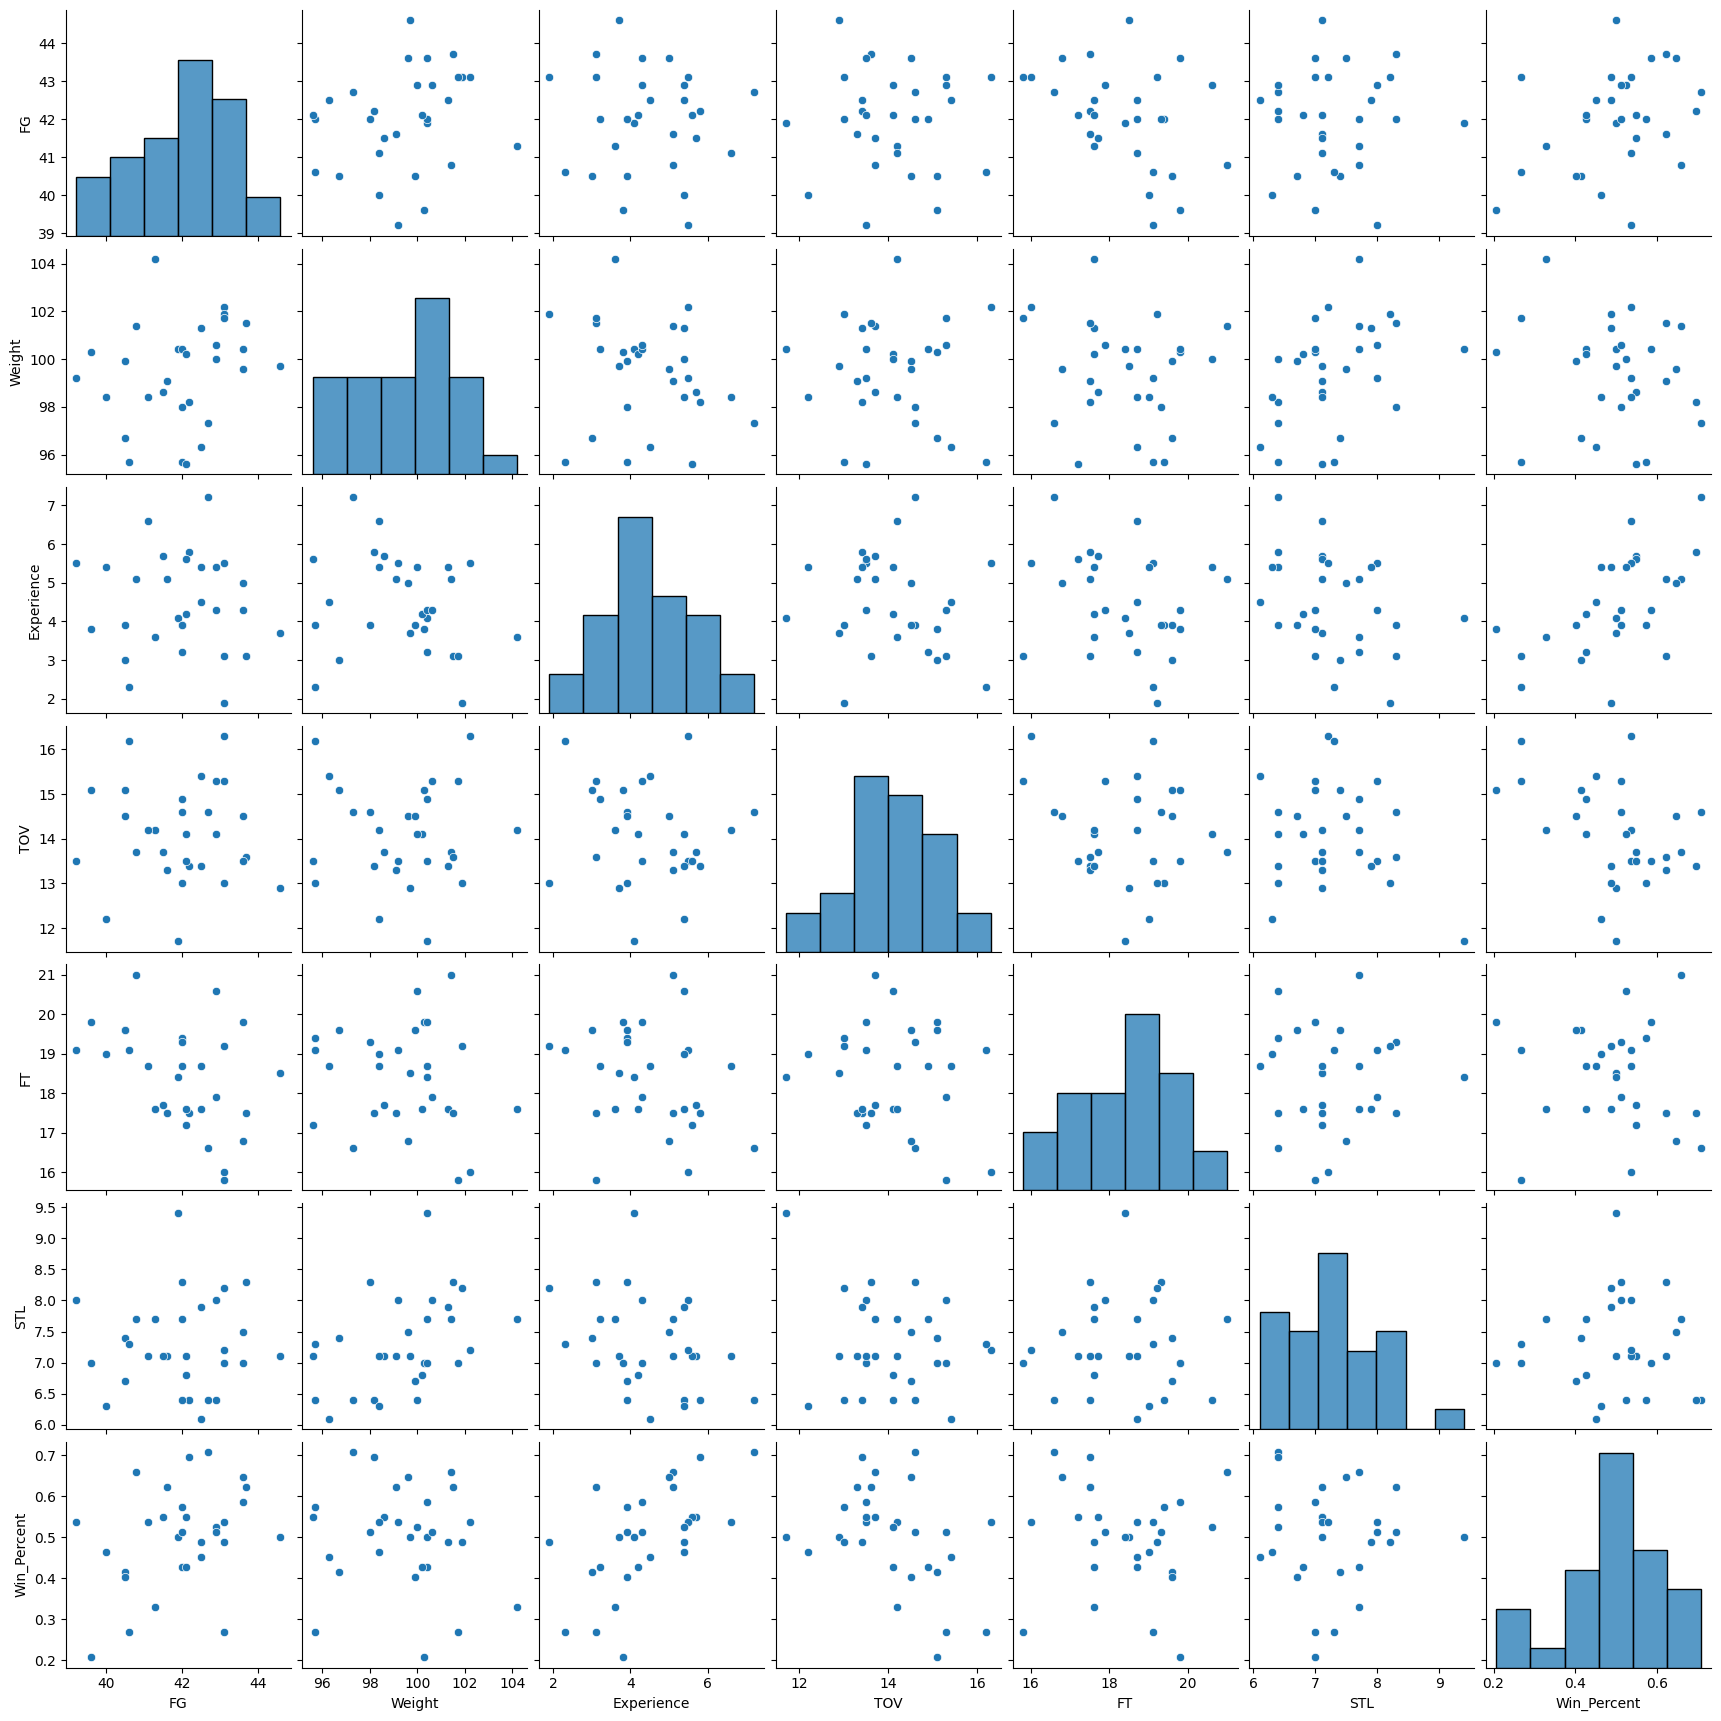

In [ ]:
#2
# Pairplot for pairwise comparisons of numerical variables
#sns.pairplot(train_stats, vars = ["MP", "FG", "FGA", "FG_Percent", "Three_PointFG", "Three_PointAssist", "Three_PointFG__Percent", "Two_PointFG", "Two_PointAssist", "Two_PointFG__Percent", "FT", "FTA", "FT_Percent", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Height", "Weight", "Age", "Experience"], palette='viridis')
#plt.suptitle('Pairwise Relationships of Numerical Variables', y = 1.02)
#plt.show()
#print("\n")

#3
# Distribution of age using histogram
sns.histplot(train_stats['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()
print("\n")

#3
# Distribution of height using histogram
sns.histplot(train_stats['Height'], bins=20, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.show()
print("\n")

#4
variables = ['FG', 'FT', 'TOV', 'STL', 'Weight', 'Experience']

# Loop through each variable and create bar plots
for variable in variables:
    # Create a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=train_stats[variable], y=train_stats['Win_Percent'])
    plt.title(f'Bar Plot of Win Percent vs. {variable}')
    plt.xlabel(variable)
    plt.ylabel('Win Percent')
    plt.show()

#5
#Correlation
variables = ['FG', 'Weight', 'Experience', 'TOV', 'FT', 'STL']
correlation_matrix = train_stats[variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()


#pairplot
variables = ['FG', 'Weight', 'Experience', 'TOV', 'FT', 'STL','Win_Percent']

# Create a pairplot
sns.pairplot(train_stats[variables], kind='scatter')

# Show the pairplot
plt.show()


In [ ]:
# Train model
lm1 = smf.ols(formula='Win_Percent ~ FG + TOV + PF',
              data = train_stats)
result1 = lm1.fit()
result1.params

Intercept    0.479881
FG           0.027093
TOV         -0.035740
PF          -0.030706
dtype: float64

In [ ]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            Win_Percent   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.538
Date:                Wed, 08 May 2024   Prob (F-statistic):             0.0110
Time:                        03:32:18   Log-Likelihood:                 27.292
No. Observations:                  30   AIC:                            -46.58
Df Residuals:                      26   BIC:                            -40.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4799      0.823      0.583      0.5

In [ ]:
lm2 = smf.ols(formula='Win_Percent ~ Height + Experience',
              data = train_stats)
result2 = lm2.fit()
result2.params

Intercept    -0.150724
Height        0.001960
Experience    0.058123
dtype: float64

In [ ]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            Win_Percent   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7.213
Date:                Wed, 08 May 2024   Prob (F-statistic):            0.00309
Time:                        03:32:23   Log-Likelihood:                 27.397
No. Observations:                  30   AIC:                            -48.79
Df Residuals:                      27   BIC:                            -44.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1507      2.909     -0.052      0.9

In [ ]:
lm3 = smf.ols(formula='Win_Percent ~ FG + FT + TOV + STL + Weight + Experience',
              data = train_stats)
result3 = lm3.fit()
result3.params

Intercept    -0.942813
FG            0.048678
FT            0.017279
TOV          -0.023535
STL           0.041452
Weight       -0.011988
Experience    0.067840
dtype: float64

In [ ]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:            Win_Percent   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     7.845
Date:                Wed, 08 May 2024   Prob (F-statistic):           0.000112
Time:                        03:33:21   Log-Likelihood:                 37.685
No. Observations:                  30   AIC:                            -61.37
Df Residuals:                      23   BIC:                            -51.56
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9428      1.070     -0.881      0.3

In [ ]:
# Testing

x_test_data = test_stats[test_stats.columns.difference(['Team', 'Win_Percent'])]
y_test_data = test_stats['Win_Percent']
yhat_test = result3.predict(x_test_data)

res = pd.concat([y_test_data, yhat_test], axis=1)
res.columns = ['True_Win_Percent', 'Predicted_Win_Percent']
res

,True_Win_Percent,Predicted_Win_Percent
0,0.780,0.657900
1,0.610,0.497118
2,0.598,0.758327
3,0.585,0.525665
4,0.573,0.374471
5,0.573,0.757300
6,0.573,0.837325
7,0.561,0.564145
8,0.476,0.642680
9,0.439,0.580041


In [ ]:
MSE = np.square(np.subtract(y_test_data,yhat_test)).mean()
MSE

0.01609195876941577